# Control Flow Automaton (CFA)

<div>
<img src="attachment:Diagrama_Projeto.png" width="500"/>
</div>

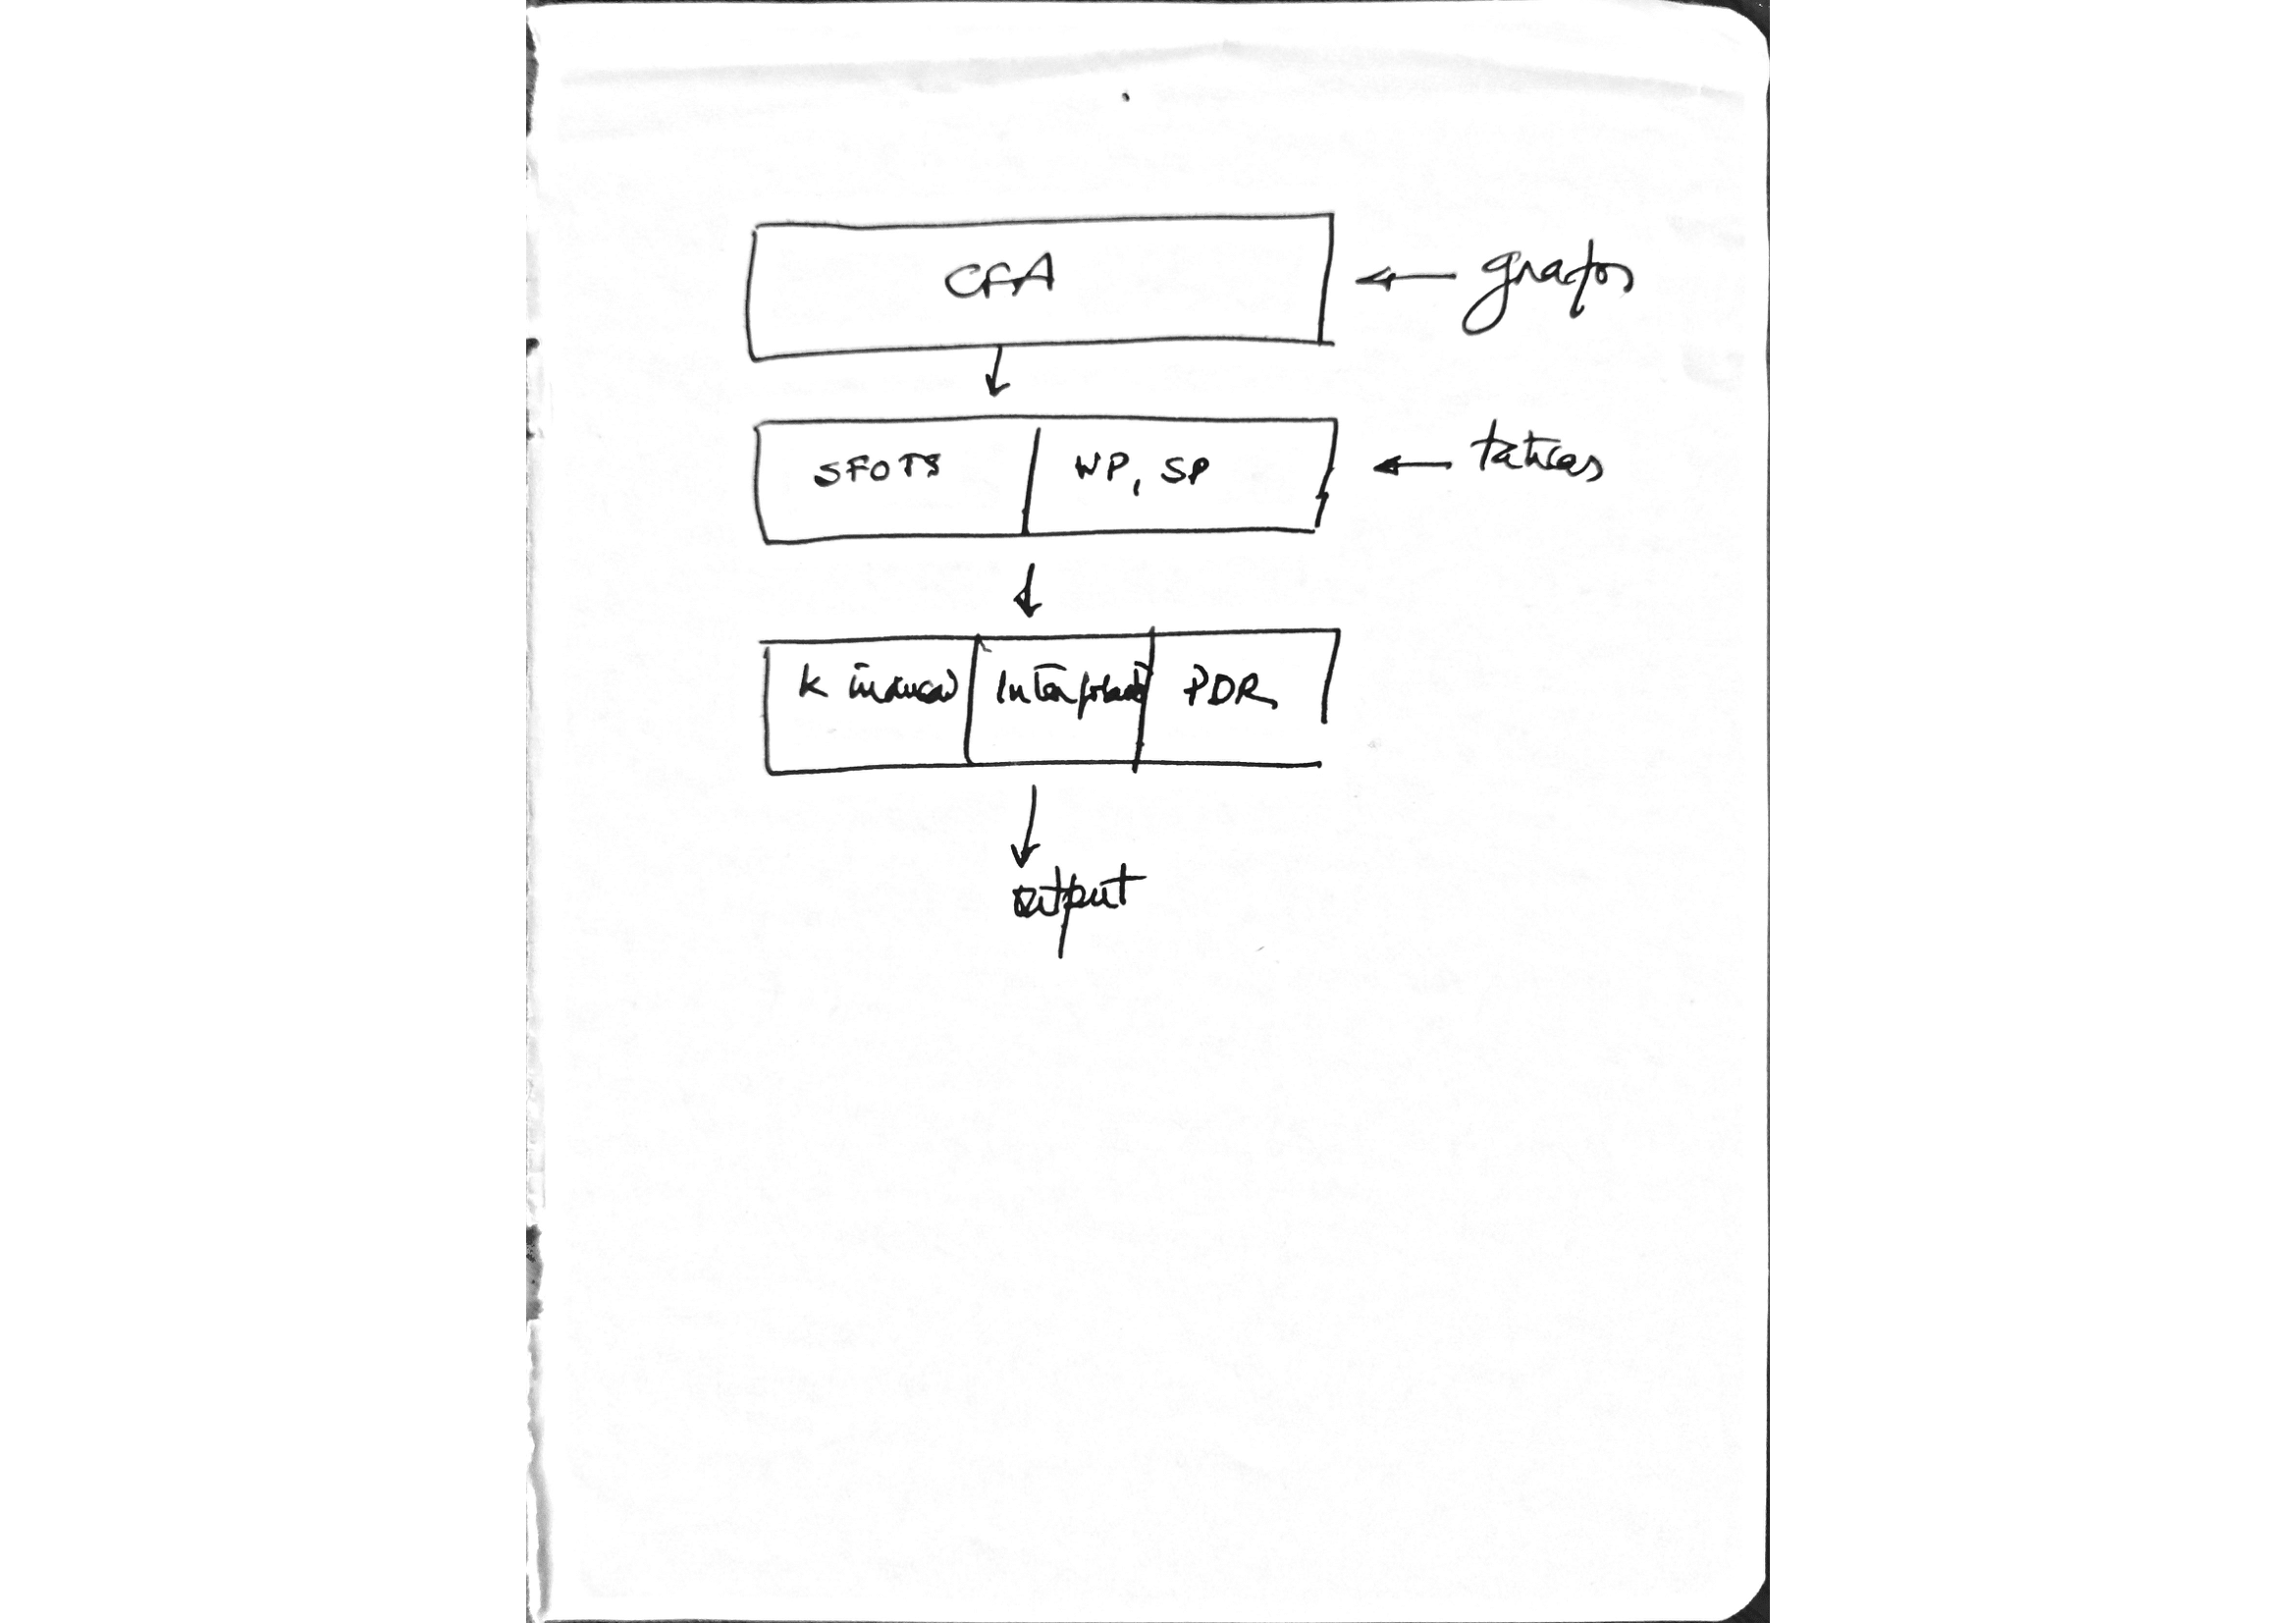

## Multiplicação de dois inteiros

<div>
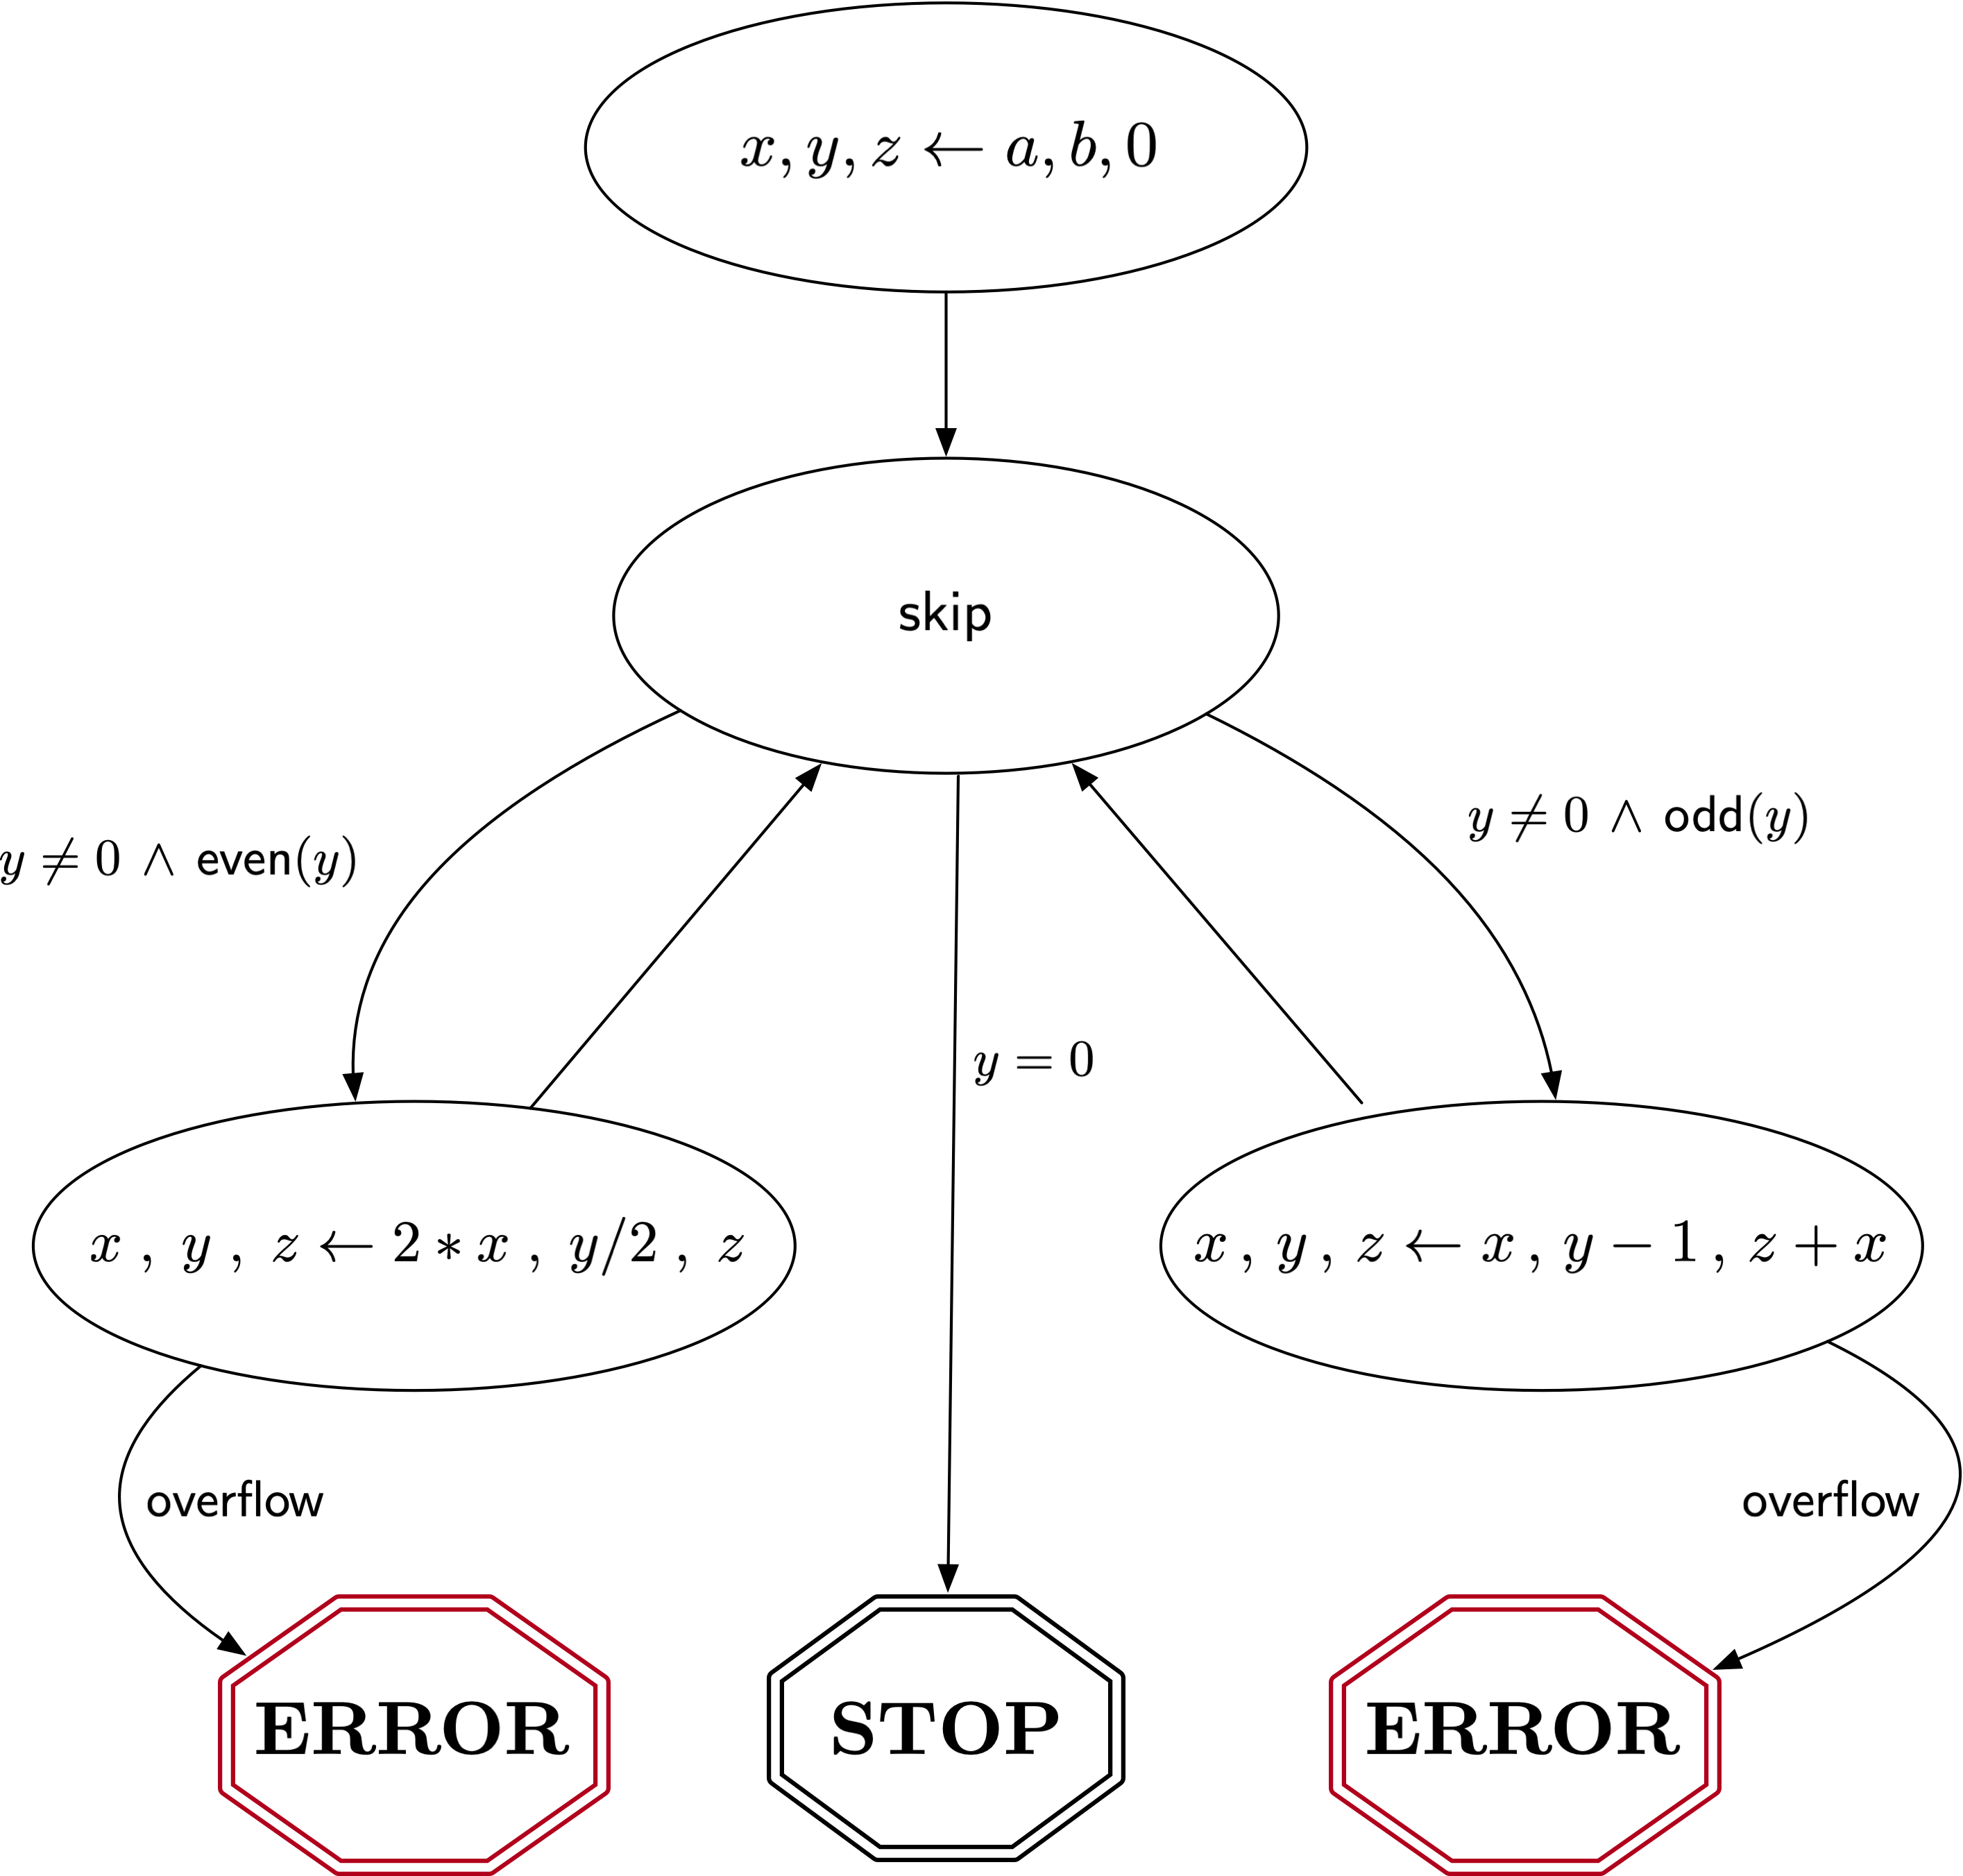
</div>

## Problema representado num autómato

<div>
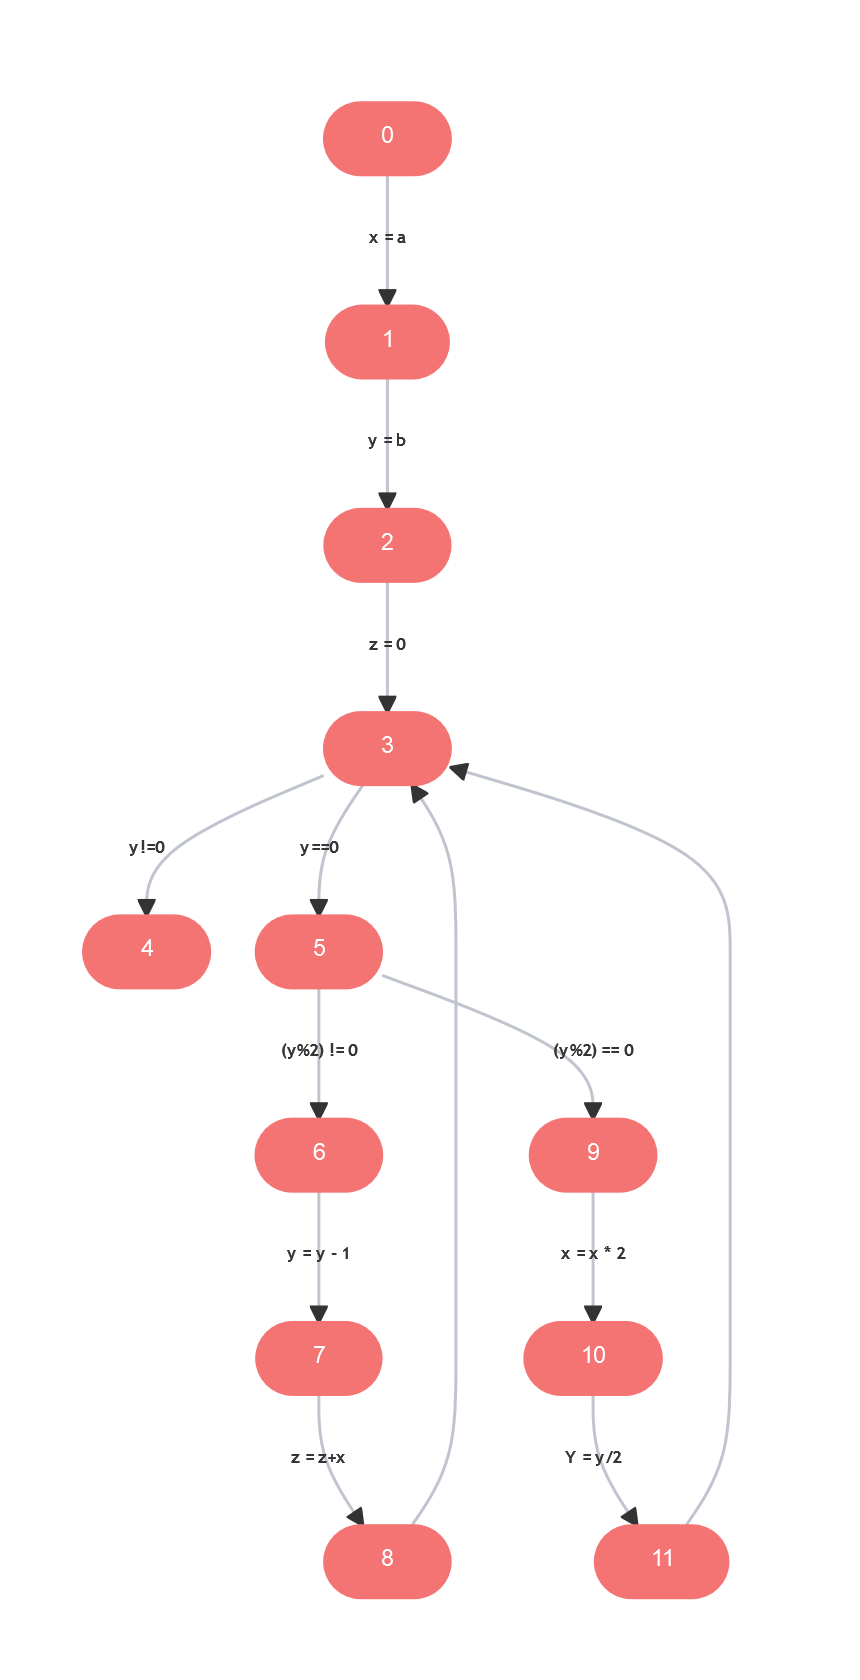
</div>

## Grafo representado com recurso ao NetworkX

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.DiGraph()

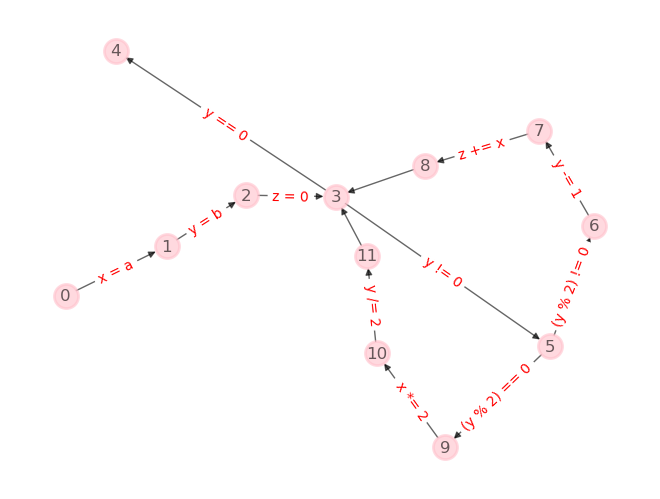

In [34]:
edges = [[0, 1], [1, 2], [2, 3],[3,4],[3,5],[5,6],[6,7],[7,8],[8,3],[5,9],[9,10],[10,11],[11,3]]


G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=2,
    node_size=300, node_color='pink', alpha=0.6,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(0, 1): 'x = a', 
                 (1, 2): 'y = b',
                 (2, 3): 'z = 0',
                 (3, 4): 'y == 0',
                 (3, 5): 'y != 0',
                 (5, 6): '(y % 2) != 0',
                 (6, 7): 'y -= 1',
                 (7, 8): 'z += x',
                 (5, 9): '(y % 2) == 0',
                 (9, 10): 'x *= 2',
                 (10, 11): 'y /= 2',
                },
    font_color='red'
)
plt.axis('off')
plt.show()

### Parsing 

### Cenas SFOTS

In [2]:
from pysmt.shortcuts import *

In [9]:
pysmt.fnode.FNode(Equals('x',BV(0,16)), 1)

AttributeError: 'str' object has no attribute 'node_type'

In [62]:
mathAdj = {
    "0": {"1": "x = a"},
    "1": {"2": "y = b"},
    "2": {"3": "z = 0"},
    "3": {"4": "y == 0", "5": "y != 0"},
    "5": {"6": "(y%2) != 0", "9": "(y%2) == 0"},
    "6": {"7": "y = y-1"},
    "7": {"8": "z = z + x"},
    "8": {"3": ""},
    "9": {"10": "x = x*2"},
    "10": {"11": "y = y/2"},
    "11": {"3": ""},
}

smtAdj= {
    "0": {"1": "Equals('x', BV(a))"},
    "1": {"2": "Equals('y', BV(b))"},
    "2": {"3": "Equals('z', BV(0))"},
    "3": {"4": "And(Equals(prox['pc'], bv(4)), Equals(curr['y'], bv(0))",
          "5": "And(Equals(prox['pc'], bv(5)), NotEquals(curr['y'], bv(0))"},
    "5": {"6": "And(Equals(prox['pc'], bv(6)), Equals(BVURem(curr['y'], BV(2)), BV(1)))",
          "9": "And(Equals(prox['pc'], bv(9)), Equals(BVURem(curr['y'], BV(2)), BV(0)))"},
    "6": {"7": "And(Equals(prox['pc'], bv(7)), Equals(prox['y'], BVSub(curr['y'], BV(1))))"},
    "7": {"8": "And(Equals(prox['pc'], bv(8)), Equals(prox['z'], BVAdd(curr['z'], curr['x'])))"},
    "8": {"3": ""},
    "9": {"10": "And(Equals(prox['pc'], bv(10)), Equals(prox['x'], BVMul(curr['x'], BV(2))))"},
    "10": {"11": "And(Equals(prox['pc'], bv(11)), Equals(prox['y'], BVUDiv(curr['y'], BV(2))))"},
    "11": {"3": ""},
}

symbols = {"'x'": 16, "'y'": 16, "'z'": 16}

def geraEstado(symbols, values):
    return "gera"

def correGrafo(adj, symbs):
    cloneSymbs = symbs
    genVars = []
    listSymbs = list(cloneSymbs.keys())
    for node in adj:
        for dest in adj[node]:
            if(adj[node][dest] != ""):
                var = adj[node][dest].split(',')[0].split('(')[1]
                print(adj[node][dest])
                if(var in  listSymbs):
                    genVars.append(adj[node][dest])
                
                
    print(genVars)        
            
        
    return 
    
correGrafo(smtAdj, symbols)   

Equals('x', BV(a))
Equals('y', BV(b))
Equals('z', BV(0))
And(Equals(prox['pc'], bv(4)), Equals(curr['y'], bv(0))
And(Equals(prox['pc'], bv(5)), NotEquals(curr['y'], bv(0))
And(Equals(prox['pc'], bv(6)), Equals(BVURem(curr['y'], BV(2)), BV(1)))
And(Equals(prox['pc'], bv(9)), Equals(BVURem(curr['y'], BV(2)), BV(0)))
And(Equals(prox['pc'], bv(7)), Equals(prox['y'], BVSub(curr['y'], BV(1))))
And(Equals(prox['pc'], bv(8)), Equals(prox['z'], BVAdd(curr['z'], curr['x'])))
And(Equals(prox['pc'], bv(10)), Equals(prox['x'], BVMul(curr['x'], BV(2))))
And(Equals(prox['pc'], bv(11)), Equals(prox['y'], BVUDiv(curr['y'], BV(2))))
["Equals('x', BV(a))", "Equals('y', BV(b))", "Equals('z', BV(0))"]
